# MEDICAL COST PREDICTION USING LINEAR REGRESSION

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import style

### DATA PREPROCESSING

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

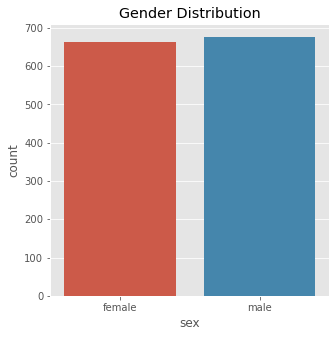

In [10]:
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.show()

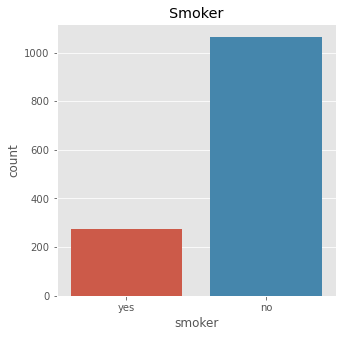

In [11]:
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='smoker', data=df)
plt.title('Smoker')
plt.show()

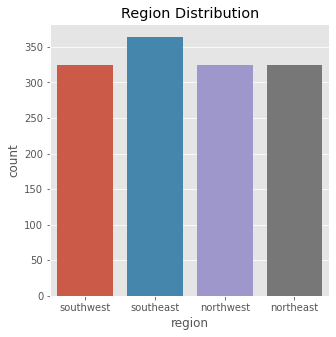

In [12]:
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='region', data=df)
plt.title('Region Distribution')
plt.show()

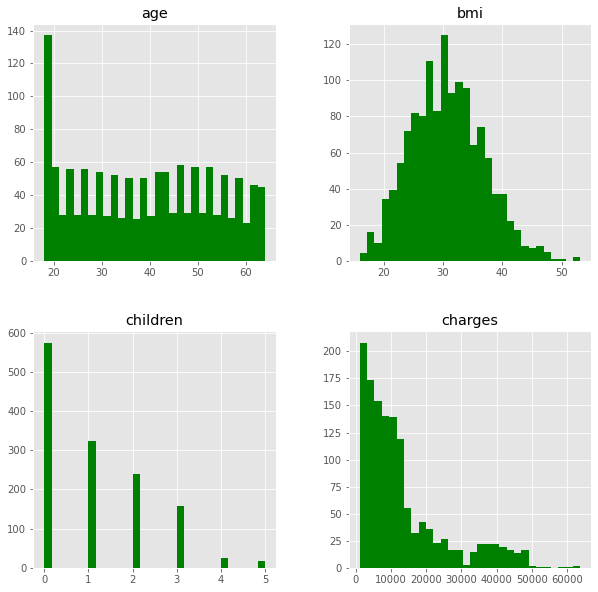

In [46]:
df[['age','bmi','children','charges']].hist(bins=30, figsize=(10,10), color='green')
plt.show()

In [13]:
df.replace({'sex':{'female' : 0,'male':1}},inplace=True)
df.replace({'smoker':{'yes' : 0,'no':1}},inplace=True)
df.replace({'region':{'southwest' : 0,'southeast':1,'northwest':2,'northeast':3}},inplace=True)

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


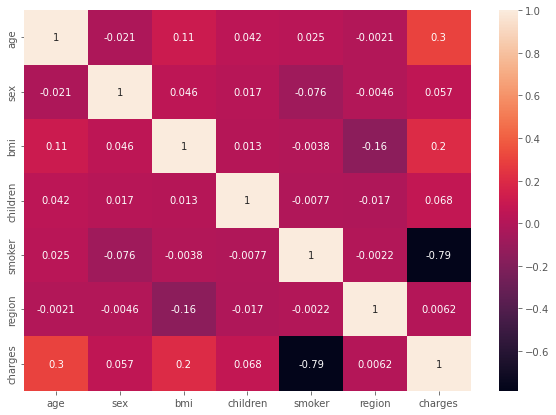

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [16]:
X = df.drop(['charges'], axis=1)
Y = df.charges

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state=1)

In [18]:
X_train.shape

(802, 6)

In [19]:
X_test.shape

(536, 6)

In [20]:
Y_train.shape

(802,)

In [21]:
Y_test.shape

(536,)

### LINEAR REGRESSION MODEL

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train, Y_train)
pred = model.predict(X_test)

### PERFORMANCE ANALYSIS

In [39]:
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

In [40]:
print("R2 score: ",(r2_score(Y_test, pred)))

R2 score:  0.738148519357055


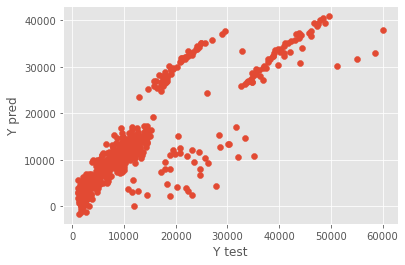

In [41]:
plt.scatter(Y_test, pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

Text(0.5, 1.0, 'Actual Vs Predicted Price')

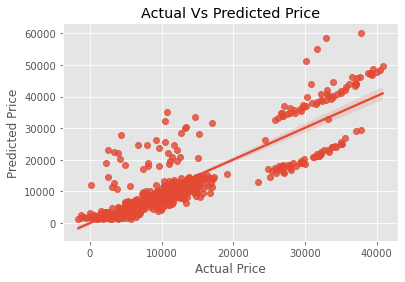

In [42]:
sns.regplot(x=pred,y=Y_test)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Vs Predicted Price')

In [45]:
model.score(X_test,Y_test)

0.738148519357055